In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv(r"D:\ML\WsCubeTech\data\loan\df1_loan.csv")
dataset.head(3)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0


In [3]:
dataset.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

C:\Users\ashut\AppData\Local\Temp\ipykernel_15388\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


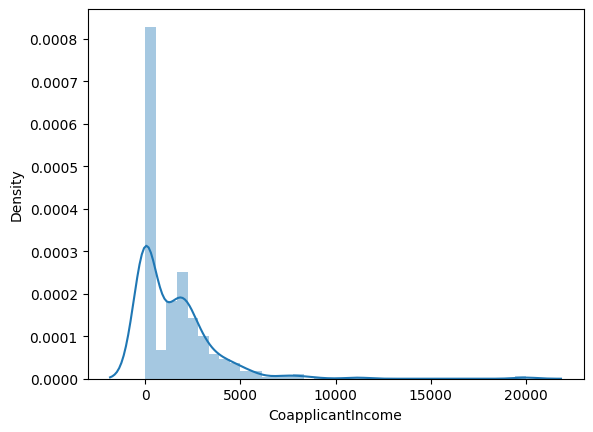

In [4]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [5]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

In [6]:
IQR = q3-q1
IQR

2253.25

In [7]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(-3379.875, 5633.125)

In [10]:
dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

In [11]:
dataset.shape

(485, 15)

C:\Users\ashut\AppData\Local\Temp\ipykernel_15388\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


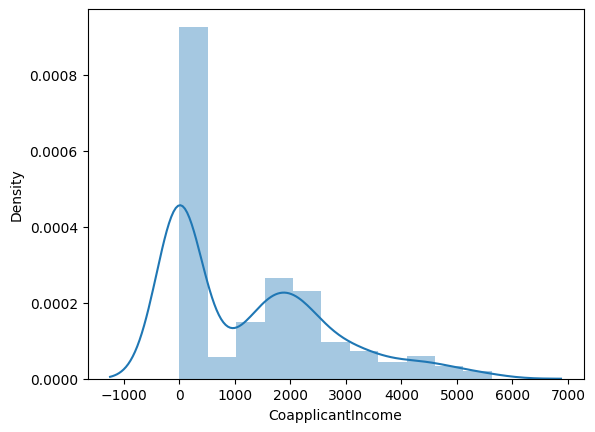

In [12]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [13]:
from sklearn.preprocessing import FunctionTransformer

In [16]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [17]:
dataset["CoapplicantIncome_tf"] = ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\ashut\AppData\Local\Temp\ipykernel_15388\3647069048.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\ashut\AppData\Local\Temp\ipykernel_15388\3647069048.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


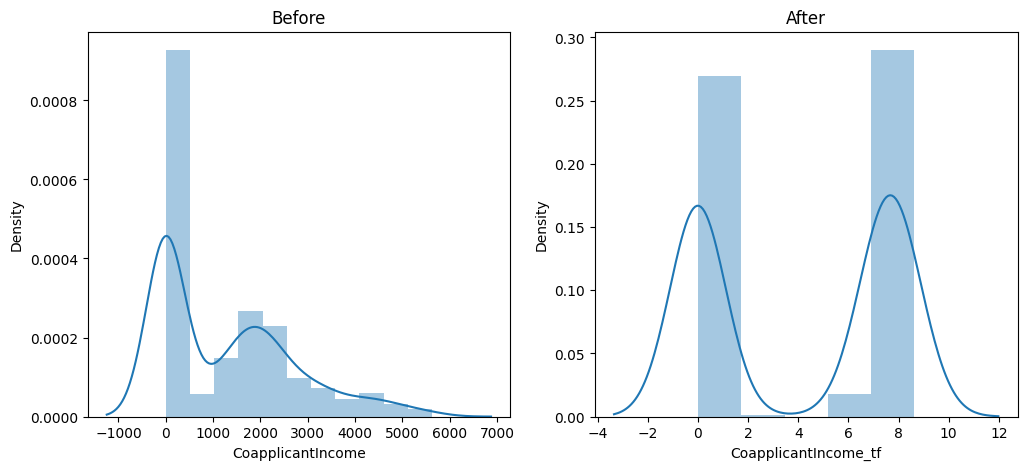

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_tf"])

plt.show()

# With and without outlier
# Why we need FunctionTransformer